In [17]:
import pandas as pd
import numpy as np
import ndjson
import os
import random as rd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json
import collections

os.chdir('../Data/pan19-celebrity-profiling-training-dataset-2019-01-31')

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: '../Data/pan19-celebrity-profiling-training-dataset-2019-01-31'

In [5]:
# load from file-like objects
with open('labels_pre.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

lb = pd.DataFrame(data)

NameError: name 'ln' is not defined

In [7]:
lb = lb.transpose()

In [18]:
lb['life_phase'] = ''
lb['life_phase'] = np.where(2019 - lb['birthyear'] > 65, 'retiree', lb['life_phase'])
lb['life_phase'] = np.where(2019 - lb['birthyear'] < 66, 'old_adult_65', lb['life_phase'])
lb['life_phase'] = np.where(2019 - lb['birthyear'] < 51, 'adult_50', lb['life_phase'])
lb['life_phase'] = np.where(2019 - lb['birthyear'] < 36, 'young_adult_35', lb['life_phase'])
lb['life_phase'] = np.where(2019 - lb['birthyear'] < 22, 'child_21', lb['life_phase'])

collections.Counter(lb.life_phase)

Counter({'retiree': 2405,
         'old_adult_65': 6211,
         'adult_50': 11480,
         'young_adult_35': 13029,
         'child_21': 711})

In [3]:

def file_len(fname):
    with open(fname , 'r', encoding='utf-8') as f:
        for i, l in enumerate(f):
            pass
    f.close()
    return i + 1

# load from file-like objects

lines = file_len('feeds.ndjson')

rd.seed(12345)
sf = rd.sample(range(lines), round(lines/10))
sf.sort()

with open('feeds.ndjson', 'r', encoding='utf-8') as f:
    feed = pd.DataFrame(data ={"id":[0], "text":[[]]} )
    i = 0
    for line in f:
        i +=1
        if i in sf:
            array = ndjson.loads(line)
            #print(array)
            tdic = {"id": array[0]["id"], "text":[array[0]["text"]]}
            tmp = pd.DataFrame.from_records(tdic)
            #print(tmp)
            feed = pd.concat([feed, tmp], copy = False, ignore_index= True)
            del(tmp)
            del(array)
            del(tdic)
            sf.pop(sf.index(i))
f.close()
            

    
lb = lb.merge(feed.id, how='inner', on='id', copy=False)    
    

#feed = pd.DataFrame(array)
#del(array)

In [4]:
lb['amount'] = 1
years = list(np.unique(lb.birthyear))
run = min(years)
maxy = max(years)
intervals = [run]
while run< maxy:
    run+=5
    intervals.append(run)
lb['intervals'] = 0
for row in lb.itertuples():
    lb['intervals'][row[0]] = [age for age in intervals if lb['birthyear'][row[0]] >= age][-1]
        
    
    
   

c:\users\schubert\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [73]:
lb

gender  intervals occupation       fame  birthyear     id
0       male       1970    science       star       1970  12598
1       male       1985     sports       star       1987  11760
2       male       1995     sports     rising       1995   7330
3       male       1960    manager       star       1960  26959
4     female       1980  performer       star       1981   3561
5     female       1970  performer  superstar       1971  27422
6       male       1985  performer       star       1988  48019
7       male       1980     sports       star       1981  14428
8       male       1990     sports       star       1991  26209
9       male       1970  performer       star       1972   5696
10    female       1985  performer       star       1988  10078
11      male       1985  performer  superstar       1989   5392
12      male       1945    science       star       1947   6458
13    female       1960  performer  superstar       1960  24068
14      male       1990     sports     rising       1994  31903
15      male       1975     sports       star       1975  33875
16      male       1965   politics  superstar       1969    208
17      male       1975  performer  superstar       1979  44318
18    female       1980   politics       star       1981  44213
19    female       1970  performer  superstar       1974  11555
20      male       1985  performer       star       1987  40832
21      male       1990     sports       star       1994  25486
22    female       1995  performer  superstar       1995  18881
23      male       1990     sports     rising       1994  10247
24      male       1985  performer  superstar       1987  14927
25      male       1995     sports       star       1998  35859
26      male       1990  performer       star       1991   5979
27      male       1975     sports  superstar       1978  23559
28      male       1990  performer       star       1994  29663
29      male       1985  performer  superstar       1987  46088
...      ...        ...        ...        ...        ...    ...
3353  female       1975    creator       star       1979   4294
3354    male       1950   politics       star       1954  16228
3355    male       2000  performer       star       2000  36111
3356  female       1955   politics       star       1956  31072
3357  female       1955  performer       star       1958  35834
3358  female       1970  performer       star       1970   7655
3359  female       1955  performer  superstar       1956  23790
3360  female       1985  performer       star       1987   8373
3361    male       1980     sports  superstar       1980  33011
3362  female       1950  performer       star       1951  17426
3363    male       1955     sports       star       1955  33168
3364    male       1975     sports       star       1978  21381
3365    male       1995     sports       star       1996  35898
3366    male       1980     sports  superstar       1980  18208
3367    male       1990     sports       star       1991  30771
3368  female       1980    creator       star       1984  17639
3369    male       1980  performer       star       1981  10731
3370    male       1955   politics       star       1959  29019
3371    male       1990     sports     rising       1992   7010
3372  female       1990     sports       star       1993  29430
3373    male       1990  performer       star       1991  43636
3374  female       1960   politics       star       1962  45746
3375    male       1990    creator       star       1991  26275
3376  female       1985  performer       star       1988  37181
3377  female       1970  performer       star       1972  46902
3378    male       1995     sports       star       1995  20509
3379    male       1990  performer       star       1991  37669
3380  female       1995     sports  superstar       1997  23530
3381  female       1960  performer       star       1963  45565
3382    male       1970  performer       star       1971   7773

[3383 rows x 6 columns]

In [72]:
lb = lb[['gender', 'intervals', 'occupation', 'fame', 'birthyear', 'id']]

c:\users\schubert\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


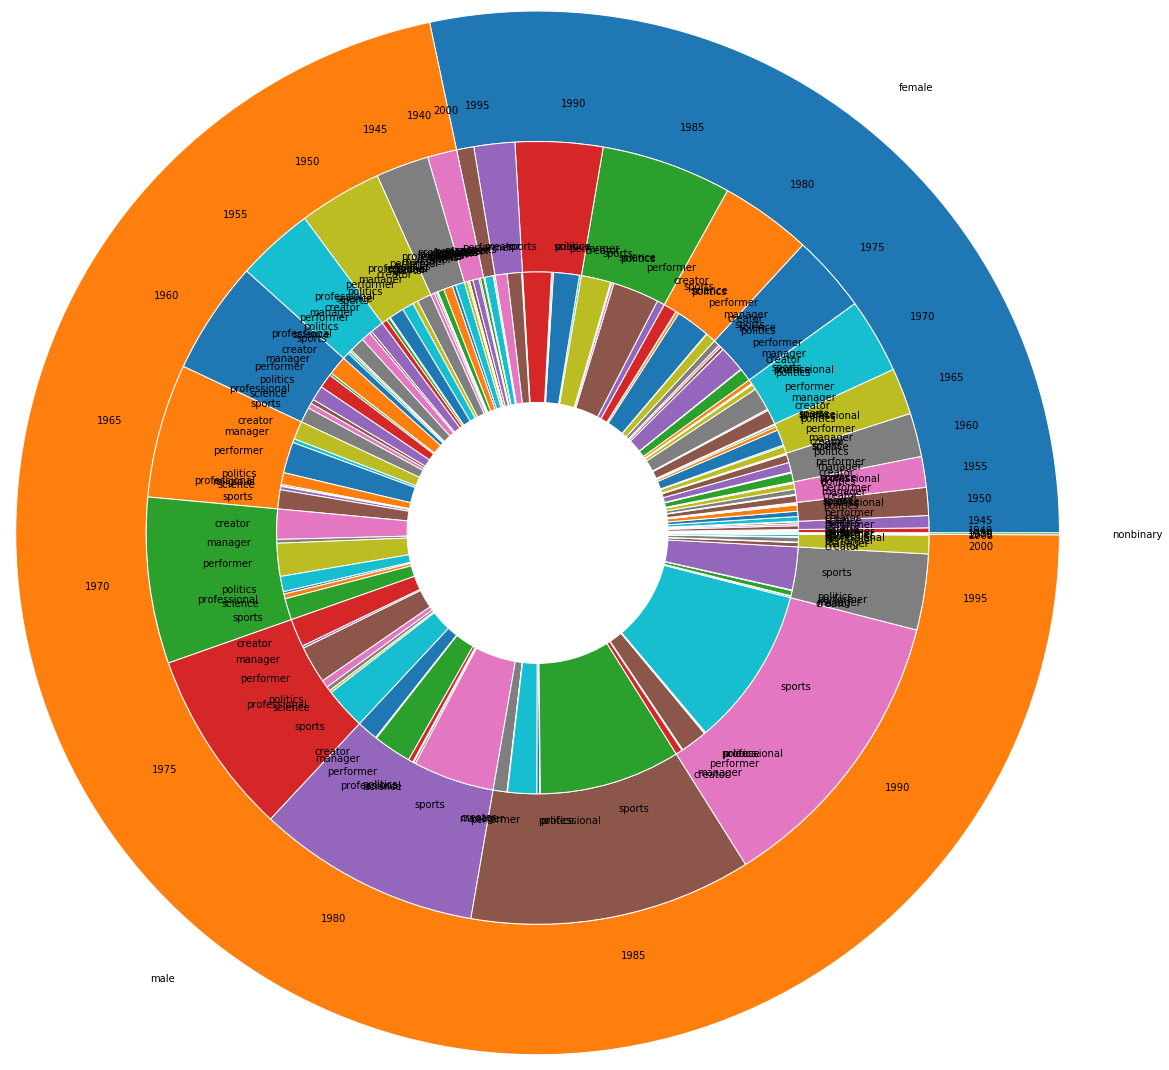

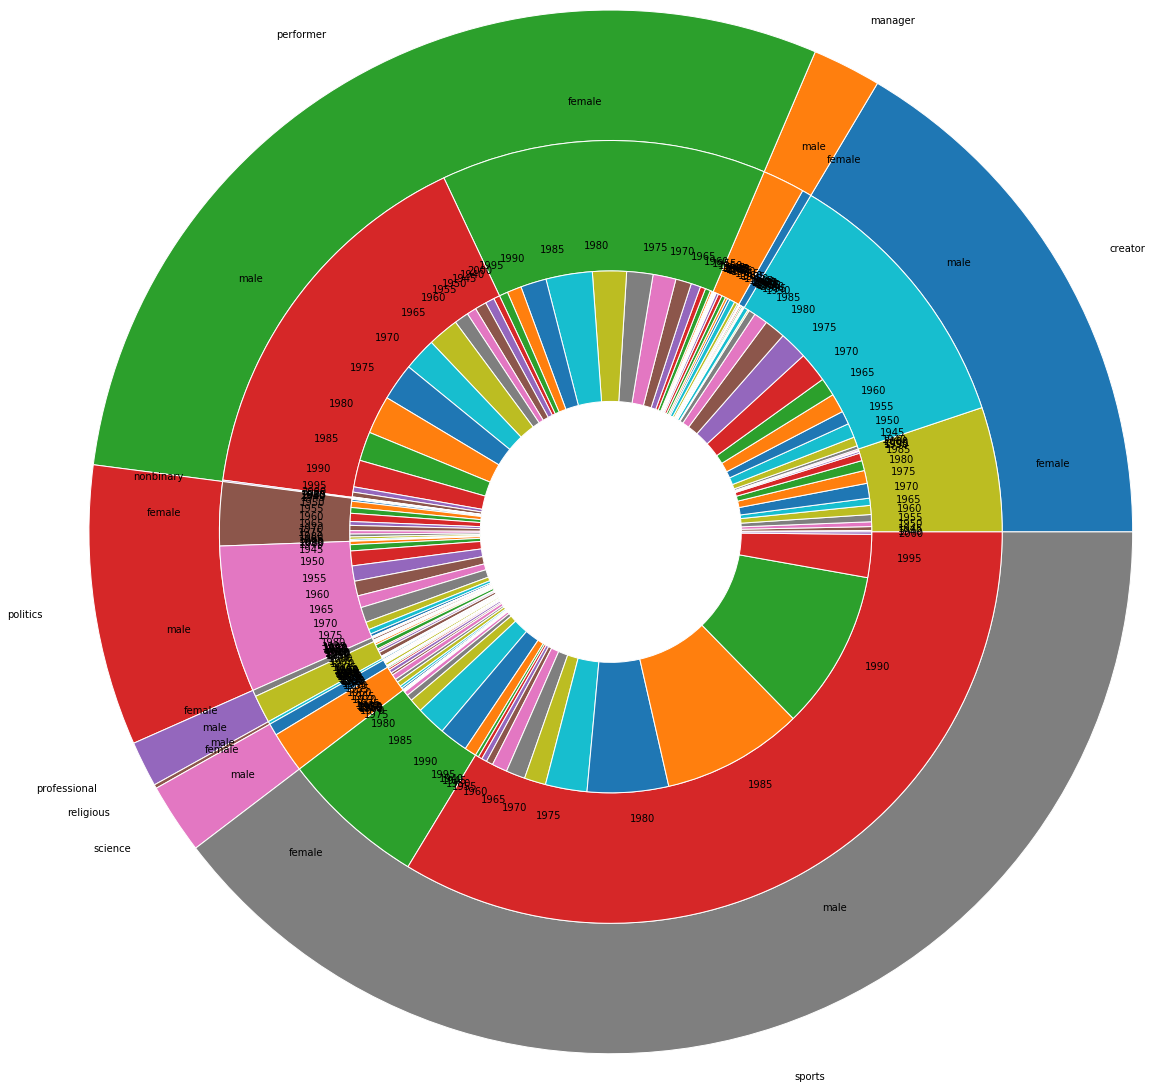

In [172]:
depth = 3
size = 6/np.float(depth+1)
cmap = plt.get_cmap("tab20c")
#outer_colors = cmap(np.arange(3)*4)
#inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

def get_values(df, depth):
    cols = df.columns.tolist()
    outd = []
    for i in range(0, depth):
        gb = lb.groupby(by=cols[:(i+1)]).agg(np.size)
        if i+1<2:
            outd.append({'values': gb['id'].values, 'labels': gb.index.tolist()})
        else:
            lev= gb.index.levels[-1].tolist()
            codes = gb.index.codes[-1].tolist()
            tra = [lev[codes[j]] for j in range(0, len(codes))]
            outd.append({'values': gb['id'].values, 'labels':tra})
            
    return outd


outd = get_values(lb, depth)

fig, ax = plt.subplots()

ax.pie(outd[0]['values'], labels=outd[0]['labels'], radius=6,
       wedgeprops=dict(width=size, edgecolor='w'))

for i in range(1,depth):
    ax.pie(outd[i]['values'], labels=outd[i]['labels'], radius=6-(size*i),
           wedgeprops=dict(width=size, edgecolor='w'))
    
ax.set(aspect="equal")

fig.show()

lb = lb[['occupation', 'gender', 'intervals', 'fame', 'birthyear', 'id']]

outd = get_values(lb, depth)

fig, ax = plt.subplots()

ax.pie(outd[0]['values'], labels=outd[0]['labels'], radius=6,
       wedgeprops=dict(width=size, edgecolor='w'))

for i in range(1,depth):
    ax.pie(outd[i]['values'], labels=outd[i]['labels'], radius=6-(size*i),
           wedgeprops=dict(width=size, edgecolor='w'))
    
ax.set(aspect="equal")

fig.show()

In [171]:
lb.groupby(by=lb.columns.tolist()[:depth]).agg(np.size)

fame  birthyear   id
gender    intervals occupation                        
female    1940      creator          3          3    3
                    performer        2          2    2
                    politics         2          2    2
          1945      creator          8          8    8
                    performer        4          4    4
                    politics         4          4    4
                    science          1          1    1
          1950      creator         10         10   10
                    performer       11         11   11
                    politics        13         13   13
                    professional     1          1    1
                    science          2          2    2
                    sports           2          2    2
          1955      creator         15         15   15
                    manager          2          2    2
                    performer       11         11   11
                    politics        12         12   12
                    professional     1          1    1
                    science          1          1    1
                    sports           1          1    1
          1960      creator         19         19   19
                    manager          2          2    2
                    performer       20         20   20
                    politics        17         17   17
                    science          2          2    2
                    sports           1          1    1
          1965      creator         15         15   15
                    manager          3          3    3
                    performer       33         33   33
                    politics         8          8    8
...                                ...        ...  ...
male      1980      politics        10         10   10
                    professional     2          2    2
                    science          4          4    4
                    sports         170        170  170
          1985      creator         29         29   29
                    manager          1          1    1
                    performer       61         61   61
                    politics         6          6    6
                    professional     1          1    1
                    sports         296        296  296
          1990      creator         14         14   14
                    manager          2          2    2
                    performer       56         56   56
                    politics         1          1    1
                    professional     1          1    1
                    science          1          1    1
                    sports         334        334  334
          1995      creator          3          3    3
                    manager          1          1    1
                    performer       11         11   11
                    politics         1          1    1
                    sports          90         90   90
          2000      creator          9          9    9
                    manager          1          1    1
                    performer       10         10   10
                    professional     1          1    1
                    sports           5          5    5
          2005      performer        1          1    1
nonbinary 1970      performer        1          1    1
          1980      performer        1          1    1

[161 rows x 3 columns]

In [186]:
#for finding unicode character (emoticons)
import re

tester = re.compile('\\\\U[A-Z,a-z,0-9]+')

print(tester.search(str(feed['text'][1][0].encode('unicode_escape'))))

<_sre.SRE_Match object; span=(3, 13), match='\\U0001f525'>


In [51]:


# Recode the retweet symbol RT into § (unused in English language)
def recode_tweet(tweet, sub = 'RT', symbol='§'):
    # split tweets into words
    split_tweet = tweet.split(' ')
    for i, word in enumerate(split_tweet):
        # substitute the given marker sub for the symbol
        if word == sub:
            split_tweet[i] = symbol
    tweet = ' '.join(split_tweet)
    
    return tweet
    
# Build dictionary of words
def build_dictionary(tweets, vocabulary_size):
    # Turn list of tweets (strings) into lists of symbols
    split_tweets = [j for i,j in enumerate(t) for t in tweets]
    #symbols = [x for sublist in split_tweets for x in sublist]
    
    # Initialize list of [symbol, symbol_count] for each symbol, starting with unknown
    count = [['RARE', -1]]
    
    # Now add most frequent words, limited to the N-most frequent (N=vocabulary size)
    count.extend(collections.Counter(split_tweets).most_common(vocabulary_size-1))
    
    # Now create the dictionary
    symbol_dict = {}
    # For each symbol we want in the dictionary, add it, then make it
    # the value of the prior dictionary length
    for symbol, symbol_count in count:
        symbol_dict[symbol] = len(symbol_dict)
    
    return(symbol_dict)

In [52]:
for row in feed.itertuples():
    #print(feed.at[row[0], 'text'])
    for i, tweet in enumerate(feed.at[row[0], 'text']):
        #print(tweet)
        tweet = recode_tweet(tweet)
        feed.at[row[0], 'text'][i] = tweet
        

In [16]:
feed['text'][1][22]

'RT @gucci1017: #WakeUpInTheSky new Guccimane ft \u2066@BrunoMars\u2069 \u2066@KodakBlack1k\u2069 out rite now!!!! Go🏹🏹🏹🏹🏹🏹🏹🏹🏹 https://t.co/kG51P2joZQ'

In [22]:
t = []
for i, j in enumerate(feed['text'][1][22]):
    t.append(j)
    
print(t)

['R', 'T', ' ', '@', 'g', 'u', 'c', 'c', 'i', '1', '0', '1', '7', ':', ' ', '#', 'W', 'a', 'k', 'e', 'U', 'p', 'I', 'n', 'T', 'h', 'e', 'S', 'k', 'y', ' ', 'n', 'e', 'w', ' ', 'G', 'u', 'c', 'c', 'i', 'm', 'a', 'n', 'e', ' ', 'f', 't', ' ', '\u2066', '@', 'B', 'r', 'u', 'n', 'o', 'M', 'a', 'r', 's', '\u2069', ' ', '\u2066', '@', 'K', 'o', 'd', 'a', 'k', 'B', 'l', 'a', 'c', 'k', '1', 'k', '\u2069', ' ', 'o', 'u', 't', ' ', 'r', 'i', 't', 'e', ' ', 'n', 'o', 'w', '!', '!', '!', '!', ' ', 'G', 'o', '🏹', '🏹', '🏹', '🏹', '🏹', '🏹', '🏹', '🏹', '🏹', ' ', 'h', 't', 't', 'p', 's', ':', '/', '/', 't', '.', 'c', 'o', '/', 'k', 'G', '5', '1', 'P', '2', 'j', 'o', 'Z', 'Q']
